<a href="https://colab.research.google.com/github/Veera9014/practice-data-science-code/blob/main/recommendition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
movies=pd.read_csv('Movie.csv')

In [ ]:
movies

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userId  8992 non-null   int64  
 1   movie   8992 non-null   object 
 2   rating  8992 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.9+ KB


In [ ]:
movies['movie'].nunique()

10

In [ ]:
movies['movie'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [ ]:
movies['userId'].nunique()

4081

In [ ]:
movies['rating'].value_counts()

,count
rating,
3.0,2736
4.0,2660
5.0,1394
3.5,679
2.0,542
4.5,374
2.5,277
1.0,212
1.5,61


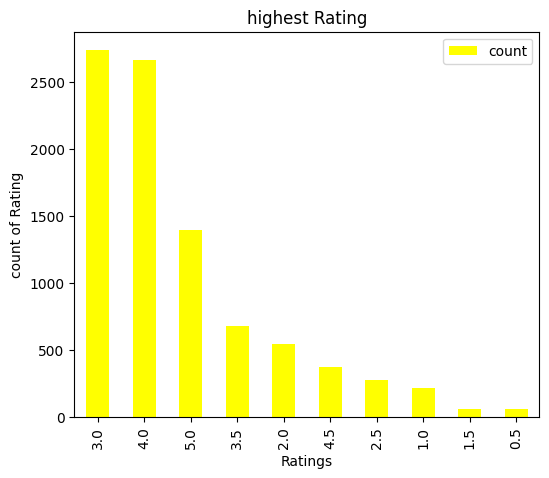

In [ ]:
movies['rating'].value_counts().plot(kind='bar',color='yellow',figsize=(6,5),title="highest Rating",
                                     xlabel='Ratings',
                                     ylabel='count of Rating',
                                     legend=True
                                     )
plt.show()

### wat is the average rating given for each movie

In [ ]:
grp=movies.groupby('movie')

In [ ]:
grp.agg('mean')['rating']

,rating
movie,
Father of the Bride Part II (1995),3.143836
GoldenEye (1995),3.427003
Grumpier Old Men (1995),3.186861
Heat (1995),3.836508
Jumanji (1995),3.268398
Sabrina (1995),3.381429
Sudden Death (1995),3.017327
Tom and Huck (1995),3.352564
Toy Story (1995),3.959323


In [ ]:
movies_orderd_by_rating=grp.agg('mean')['rating'].sort_values(ascending=False)
movies_orderd_by_rating

,rating
movie,
Toy Story (1995),3.959323
Heat (1995),3.836508
GoldenEye (1995),3.427003
Sabrina (1995),3.381429
Tom and Huck (1995),3.352564
Jumanji (1995),3.268398
Grumpier Old Men (1995),3.186861
Father of the Bride Part II (1995),3.143836
Sudden Death (1995),3.017327


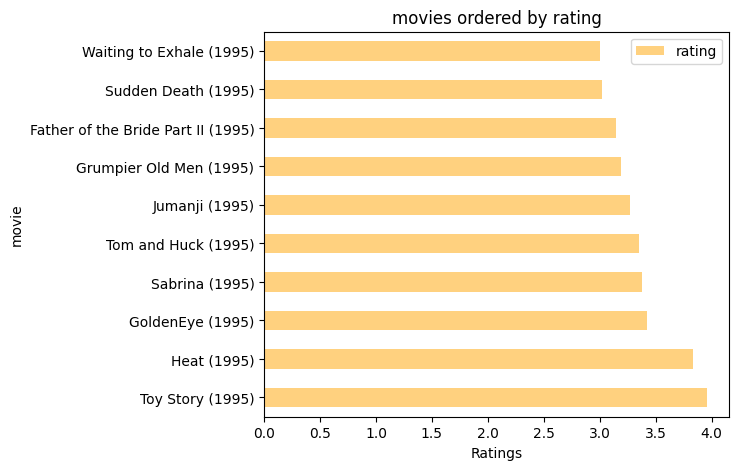

In [ ]:
movies_orderd_by_rating.plot(kind='barh',color='orange',figsize=(6,5),title="movies ordered by rating",
                                     xlabel='Ratings',

                                     legend=True,
                               alpha=0.5

                                     )
plt.show()

### how many users have rated each movies?

In [ ]:
movies['movie'].value_counts()

,count
movie,
Toy Story (1995),2569
GoldenEye (1995),1548
Heat (1995),1260
Jumanji (1995),1155
Sabrina (1995),700
Grumpier Old Men (1995),685
Father of the Bride Part II (1995),657
Sudden Death (1995),202
Waiting to Exhale (1995),138


<Axes: title={'center': 'movies ordered by rating'}, xlabel='no of Ratings', ylabel='movie'>

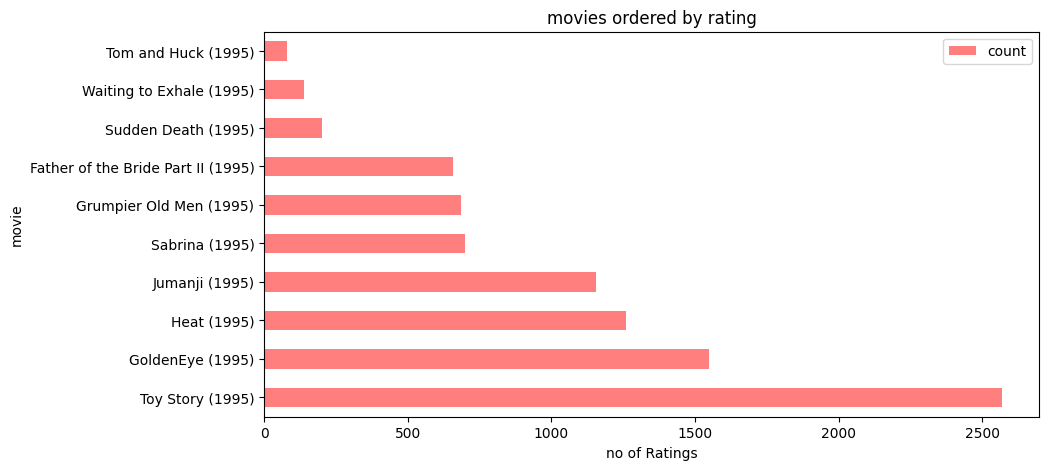

In [ ]:
movies['movie'].value_counts().plot(kind='barh',color='red',figsize=(10,5),title="movies ordered by rating",
                                     xlabel='no of Ratings',

                                     legend=True,
                               alpha=0.5

                                     )

### create the user-movie-matrix

In [ ]:
user_movie_matrix=pd.pivot_table(data=movies,index='userId',columns='movie',values='rating')
user_movie_matrix.fillna(0, inplace=True)
user_movie_matrix

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


### find user_user similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
user_sim_arr=cosine_similarity(user_movie_matrix)
user_sim_arr

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [ ]:
np.fill_diagonal(cosine_similarity(user_movie_matrix),val=0)

In [ ]:
user_sim_matrix=pd.DataFrame(cosine_similarity(user_movie_matrix),columns=movies['userId'].unique(),
                               index=movies['userId'].unique())

In [ ]:
user_sim_matrix

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543


###3 find user most similarity to user 11

In [ ]:
user=11

In [ ]:
user_sim_matrix.loc[user].sort_values(ascending=False)[:3]

,11
3,1.0
5912,1.0
743,1.0


In [ ]:
sim_user=user_sim_matrix.loc[user].sort_values(ascending=False)[:3].index
sim_user

Index([3, 5912, 743], dtype='int64')

### find movies higly rated by similar users

In [ ]:
user_movie_matrix.loc[sim_user]

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
5912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
743,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_movie_matrix.loc[sim_user].values.argsort()

array([[0, 1, 2, 3, 4, 5, 6, 7, 9, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 9, 8],
       [1, 2, 3, 5, 6, 7, 8, 9, 0, 4]])

In [ ]:
simi_movie_idx=user_movie_matrix.loc[sim_user].values.argsort()[:,-1]
simi_movie_idx

array([8, 8, 4])

In [ ]:
recommended_movies=user_movie_matrix.columns[simi_movie_idx]
recommended_movies

Index(['Toy Story (1995)', 'Toy Story (1995)', 'Jumanji (1995)'], dtype='object', name='movie')

In [ ]:
print(f'recommend{recommended_movies.values} to user{user}')

recommend['Toy Story (1995)' 'Toy Story (1995)' 'Jumanji (1995)'] to user11


In [ ]:
user_movie_matrix.T

userId,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
movie,,,,,,,,,,,,,,,,,,,,,
Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0
GoldenEye (1995),0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.5,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
Grumpier Old Men (1995),0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Heat (1995),0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0
Jumanji (1995),3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
Sabrina (1995),0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Sudden Death (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tom and Huck (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toy Story (1995),0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,4.0,4.5,...,0.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,5.0,4.5
